### About Project

Here we are going to discuss how we can build a machine learning system in python which can detect whether a person has Parkinsons disease or not.
This kind of projects comes under health care domain
Health care is one of those field where Machine learning can contribute a lot.
We can use this machine learning techniques to diagnose and find certain diseases in its early stages so that a person can get early treatment and its life can be saved.
That is why health care projects are very important for us.
So lets understand the problem statement.

It says that there is a Medical institution 
So it can be a Hospital or Medical college or  a research institutes
They are doing some researches on Parkinsons disease . How they can detect parkinsons disease early so that they can treat it.
They want us to built a model or system which can detect the Parkinson’s in a patient depending upon several condition.



Parkinson’s disease is a progressive nervous system disorder that affects movement leading to shaking, stiffness and difficulty with walking, balance and coordination. Parkinson’s symptoms usually begin gradually and get worse over time.

You know it affects mostly the person who are  more than 50 years of age.
Not necessary , because some cases are also there where people below that age  also get affected and it called Young onset of Parkinsons 
This one of the critical disease in Health care.

Here we have a data set in which there are details or information of patients who having Parkinson’s and who doesn’t have Parkinsons.

We know that  Machine Learning models can go through the data and can find Pattern in the data
And understand what are symptoms can found in patient having parkinsons and symptoms in people not having Parkinsons.


### About Dataset
Context


Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of
dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.


## Import Dependecies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("Data/Parkinsson disease.csv", header=0)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### EDA

In [3]:
print(df.describe().T)

print(df.shape)

print(df.dtypes)

                  count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   

### Handling Missing Values in Dataset

In [4]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
for i in df.columns:
    print()
    print(i, "--"*25)
    print(list(df[i].unique()))


name --------------------------------------------------
['phon_R01_S01_1', 'phon_R01_S01_2', 'phon_R01_S01_3', 'phon_R01_S01_4', 'phon_R01_S01_5', 'phon_R01_S01_6', 'phon_R01_S02_1', 'phon_R01_S02_2', 'phon_R01_S02_3', 'phon_R01_S02_4', 'phon_R01_S02_5', 'phon_R01_S02_6', 'phon_R01_S04_1', 'phon_R01_S04_2', 'phon_R01_S04_3', 'phon_R01_S04_4', 'phon_R01_S04_5', 'phon_R01_S04_6', 'phon_R01_S05_1', 'phon_R01_S05_2', 'phon_R01_S05_3', 'phon_R01_S05_4', 'phon_R01_S05_5', 'phon_R01_S05_6', 'phon_R01_S06_1', 'phon_R01_S06_2', 'phon_R01_S06_3', 'phon_R01_S06_4', 'phon_R01_S06_5', 'phon_R01_S06_6', 'phon_R01_S07_1', 'phon_R01_S07_2', 'phon_R01_S07_3', 'phon_R01_S07_4', 'phon_R01_S07_5', 'phon_R01_S07_6', 'phon_R01_S08_1', 'phon_R01_S08_2', 'phon_R01_S08_3', 'phon_R01_S08_4', 'phon_R01_S08_5', 'phon_R01_S08_6', 'phon_R01_S10_1', 'phon_R01_S10_2', 'phon_R01_S10_3', 'phon_R01_S10_4', 'phon_R01_S10_5', 'phon_R01_S10_6', 'phon_R01_S13_1', 'phon_R01_S13_2', 'phon_R01_S13_3', 'phon_R01_S13_4', 'phon_

In [6]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [7]:
df = df[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)',
        'MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3'
       ,'Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE','status']]

In [8]:
df.head

<bound method NDFrame.head of      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394      

In [9]:
df.shape

(195, 23)

### EDA with the help of Graphs & Plots

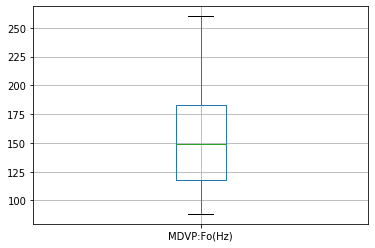

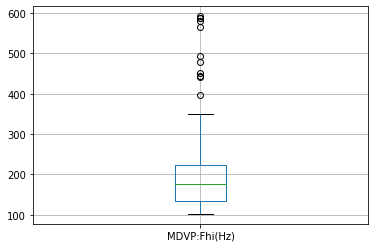

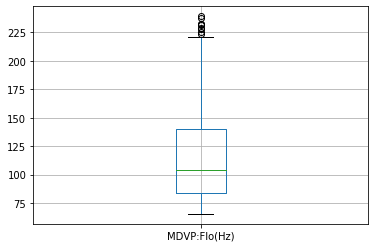

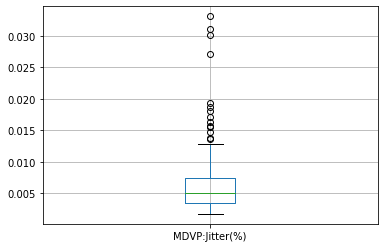

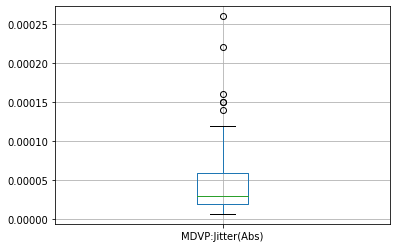

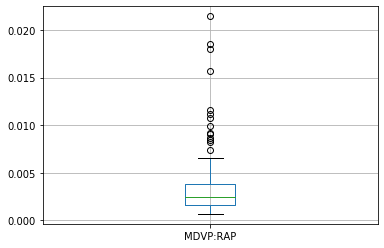

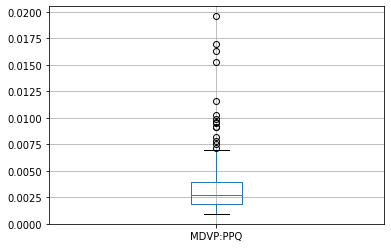

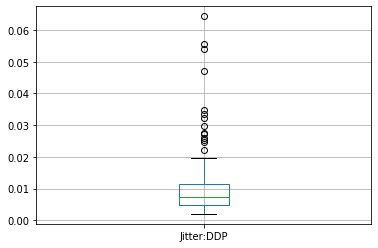

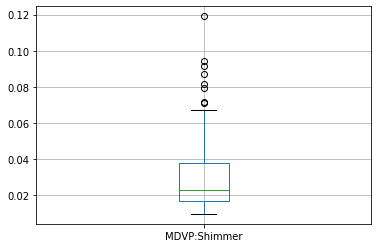

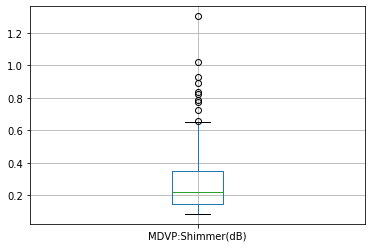

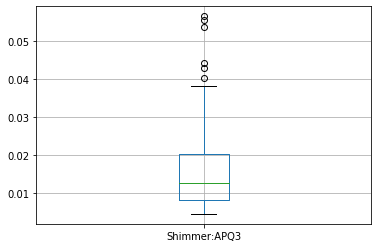

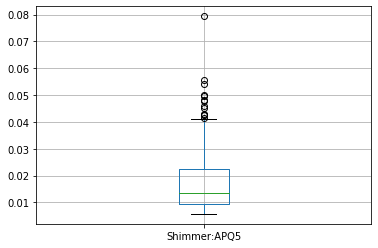

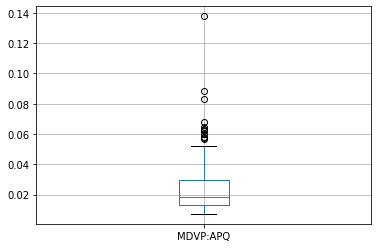

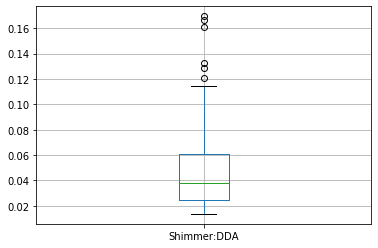

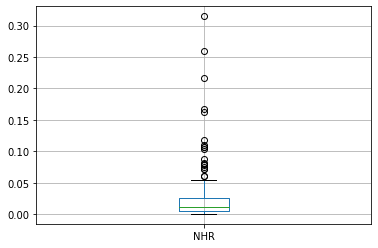

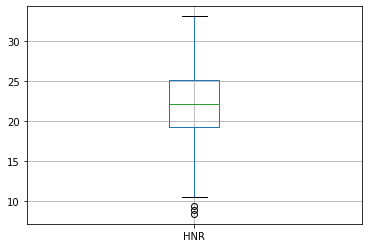

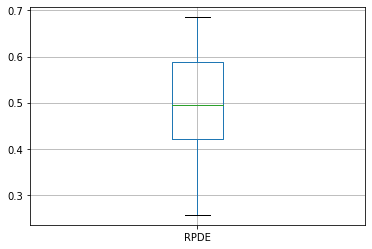

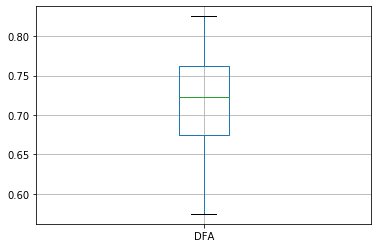

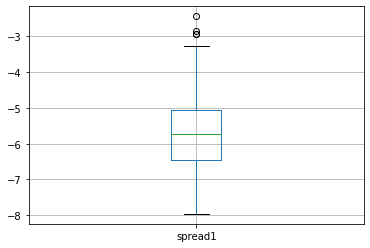

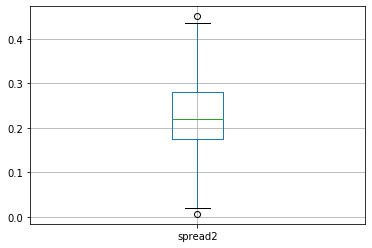

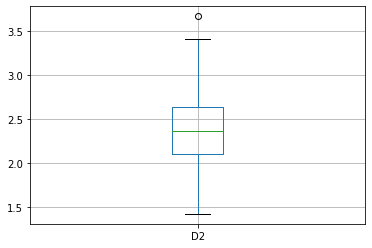

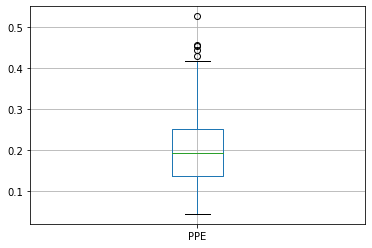

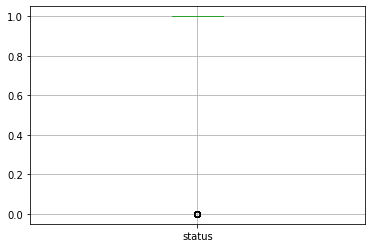

In [10]:
for i in (df.columns):
    if df[i].dtype == "int64" or df[i].dtype == "float64":
        df.boxplot(column=i)
        plt.show()

In the plot we can see Outliers in the data but by the domain knowledge of perspective those are not outliers

In [11]:
def create_piechart(data, column):
    """
    objective: Create piechart for categorical varaibles present in pandas Dataframe
    
    parameter:
        data: this is pandas dataframe
        colimn: thie is column name which is used to create plot
        
    return:
        this will show piechart
    """
    labels = list(data[column].value_counts().to_dict().keys())
    sizes = list(data[column].value_counts().to_dict().values())
    
    plt.pie(sizes,
           labels=labels,
           autopct='%1.2f%%',
           shadow=False,
           startangle=45)
    
    plt.axis('equal')
    plt.title("Piechart - {}".format(column))
    plt.show()

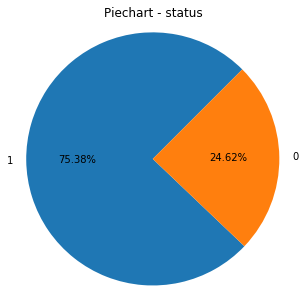

In [12]:
plt.figure(figsize=(5,5))
create_piechart(df, "status")

#### 0 --> Parkinson's Negative
#### 1 --> Parkinson's Positive

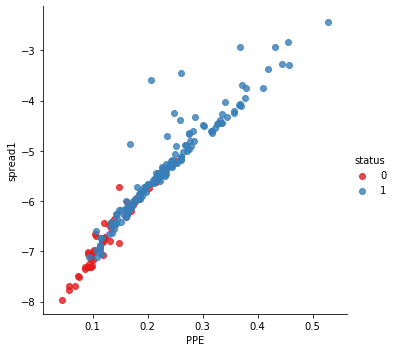

In [13]:
# sns.lmplot(data=df,x="PPE",y="spread1",fit_reg=False,hue="status",palette="Set1",markers=["*","^","o"])
sns.lmplot(data=df,x="PPE",y="spread1",fit_reg=False,hue="status",palette="Set1")

In [14]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


### Data Preprocessing

In [15]:
# X = df.drop(['name', 'status'], axis=1)
# Y = df['status']

In [16]:
X = df.values[:,:-1]
Y = df.values[:,-1]

In [17]:
Y = Y.astype(int)

In [18]:
# X = X.values[:,:]
print(X)

[[1.199920e+02 1.573020e+02 7.499700e+01 ... 2.664820e-01 2.301442e+00
  2.846540e-01]
 [1.224000e+02 1.486500e+02 1.138190e+02 ... 3.355900e-01 2.486855e+00
  3.686740e-01]
 [1.166820e+02 1.311110e+02 1.115550e+02 ... 3.111730e-01 2.342259e+00
  3.326340e-01]
 ...
 [1.746880e+02 2.400050e+02 7.428700e+01 ... 1.584530e-01 2.679772e+00
  1.317280e-01]
 [1.987640e+02 3.969610e+02 7.490400e+01 ... 2.074540e-01 2.138608e+00
  1.233060e-01]
 [2.142890e+02 2.602770e+02 7.797300e+01 ... 1.906670e-01 2.555477e+00
  1.485690e-01]]


In [19]:
# Y = Y.values[:]
# Y = Y.astype(int)
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [21]:
X.shape

(195, 22)

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                   test_size = 0.2,
                                                   random_state = 10)

print("Train Size: ", X_train.shape, Y_train.shape)
print("Test Size: ", X_test.shape, Y_test.shape)

Train Size:  (156, 22) (156,)
Test Size:  (39, 22) (39,)


In [23]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # mean = 0 and std = 1

# scaler = StandardScaler()
# # scaler = MinMaxScaler()

# scaler.fit(X_train)

# X_train_scale = scaler.transform(X_train)
# X_test_scale = scaler.transform(X_test)

# # convert y into int

# Y = Y.astype(int)  #1 0 " 1"

In [24]:
X_train

array([[ 0.30664229,  0.02039393, -0.84802822, ..., -1.33202526,
        -1.01011963, -0.11143475],
       [-0.91906852, -0.217123  , -0.44556035, ..., -1.11301284,
        -0.84639689,  0.08671194],
       [-1.13595747, -0.91242573, -0.27665792, ..., -0.51434682,
        -0.83059086, -0.47611099],
       ...,
       [-0.29216402,  0.22299834, -0.7640147 , ..., -0.19623788,
        -0.46168828,  0.31191454],
       [-0.21932673,  0.01100284, -0.82211234, ..., -1.18473881,
        -1.61299863,  0.17982787],
       [-1.43331382, -0.84379512, -0.57818055, ...,  1.19586135,
         0.13348283,  0.72101276]])

In [25]:
Y_train

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1])

In [26]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(156, 22)
(156,)
(39, 22)
(39,)


### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
# create a model
classifier = LogisticRegression()

#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)
print(Y_pred)

[1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 0]


In [28]:
df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

In [29]:
# print(list(zip(Y_test, Y_pred)))

print(list(zip(df.columns[:-1], classifier.coef_.ravel())))
#print(classifier.intercept_)
#classifier.coef_

[('MDVP:Fo(Hz)', -0.1611504297594167), ('MDVP:Fhi(Hz)', -0.19636279396606127), ('MDVP:Flo(Hz)', -0.2013807325184103), ('MDVP:Jitter(%)', -0.5339786008457198), ('MDVP:Jitter(Abs)', -0.6493945482939031), ('MDVP:RAP', 0.5171766418041435), ('MDVP:PPQ', -0.34009110943636506), ('Jitter:DDP', 0.5149619934209595), ('MDVP:Shimmer', 0.29861284532077), ('MDVP:Shimmer(dB)', 0.25116538369277963), ('Shimmer:APQ3', -0.14982983151033494), ('Shimmer:APQ5', 0.27874745509473414), ('MDVP:APQ', 0.8245565266427258), ('Shimmer:DDA', -0.14959533576839038), ('NHR', -0.19888377032373208), ('HNR', 0.3334637579443511), ('RPDE', -0.1717477440449535), ('DFA', 0.14798664420646968), ('spread1', 0.8297455044794237), ('spread2', 0.4205650800527734), ('D2', 0.6351577007808161), ('PPE', 0.931705614980295)]


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc1= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc1)

[[11  0]
 [ 1 27]]
Classification report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.96      0.98        28

    accuracy                           0.97        39
   macro avg       0.96      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39

Accuracy of the model:  0.9743589743589743


In [31]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R Square: ", r2)

adjusted_r_squared = 1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted R Square: ", adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE: ",rmse)

R Square:  0.8733766233766234
Adjusted R Square:  0.8571806100875868
RMSE:  0.16012815380508713


### KNN

In [32]:
# #Predicting using the Kneighbors classifier
# from sklearn.neighbors import KNeighborsClassifier
# model_KNN = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))), metric="minkowski")

# #euclidean,manhattan,minkowski
# #fit the model on the data and perfect the values
# model_KNN.fit(X_train,Y_train)

# Y_pred = model_KNN.predict(X_test)
# print(list(zip(Y_test,Y_pred)))

In [33]:
#Predicting using the Kneighbors classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=1, metric="manhattan")

#euclidean,manhattan,minkowski
#fit the model on the data and perfect the values
model_KNN.fit(X_train,Y_train)

Y_pred = model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

#n_neighbors=6, metric="euclidean" --> accuracy=0.9743589743589743
#n_neighbors=1 metric="manhattan" --> accuracy=1.0
#n_neighbors=6, metric="minkowski" --> accuracy=9743589743589743

[(1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0)]


In [34]:
import numpy as np
np.sqrt(len(X_train))

12.489995996796797

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc2= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc2)

[[11  0]
 [ 0 28]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        28

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

Accuracy of the model:  1.0


In [36]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R Square: ", r2)

adjusted_r_squared = 1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted R Square: ", adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE: ",rmse)

R Square:  1.0
Adjusted R Square:  1.0
RMSE:  0.0


### SVC

In [37]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf',C=10,gamma=0.01,random_state=10)
svc_model.fit(X_train,Y_train)

Y_pred = svc_model.predict(X_test)

print(list(Y_pred))

#SVC(kernel='rbf',C=126,gamma=0.001,random_state=10) -->accuracy = 0.9873563218390805
#SVC(kernel='rbf',C=1207,gamma=0.0001,random_state=10) -->accuracy = 0.9867816091954023
#SVC(kernel='linear',C=1,gamma=0.01,random_state=10) -->accuracy = 1.0

[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0]


In [38]:
svc_model.score(X_train,Y_train)

#score-->
#Y_pred=svc_model.predict(X_train)
#accuracy_score(Y_train,Y_pred)

0.8910256410256411

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc3= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc3)

[[11  0]
 [ 0 28]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        28

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

Accuracy of the model:  1.0


In [40]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R Square: ", r2)

adjusted_r_squared = 1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted R Square: ", adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE: ",rmse)

R Square:  1.0
Adjusted R Square:  1.0
RMSE:  0.0


### Decision Tree

In [41]:
# Predicting using the Desicion_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",splitter="best",random_state=10,min_samples_leaf=4,
                                         min_samples_split=4,max_depth=14)

# fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred = model_DecisionTree.predict(X_test)

#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

#criterion="gini",splitter="best",random_state=10,min_samples_leaf=8,min_samples_split=9,max_depth=8 ---> 
                                                                                    #Accuracy=0.8706896551724138
#criterion="gini",splitter="best",random_state=10,min_samples_leaf=6,min_samples_split=9,max_depth=8 ---> 
                                                                                    #Accuracy=0.8775862068965518   

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc4= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc4)

[[10  1]
 [ 0 28]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.97      1.00      0.98        28

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39

Accuracy of the model:  0.9743589743589743


In [43]:
model_DecisionTree.score(X_train,Y_train)

0.9615384615384616

In [44]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R Square: ", r2)

adjusted_r_squared = 1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted R Square: ", adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE: ",rmse)

R Square:  0.8733766233766234
Adjusted R Square:  0.8571806100875868
RMSE:  0.16012815380508713


R square tells you how much variability you can explain in the data with the help of regression equation. you will get value in the range of 0 to 1 means good model and close to 0 means worst model(sometimes you will get value less than 0 also)

In [45]:
from tabulate import tabulate

# Create a list of lists for tabulation
data = [
    ["Logistic Regression", acc1],
    ["KNN", acc2],
    ["SCV", acc3],
    ["Decision Tree", acc4],
#     ["SVC", acc5],
]

# Define the headers for the table
headers = ["Model", "Accuracy"]

# Print the table
print(tabulate(data, headers=headers, tablefmt="grid"))


+---------------------+------------+
| Model               |   Accuracy |
+=====================+============+
| Logistic Regression |   0.974359 |
+---------------------+------------+
| KNN                 |   1        |
+---------------------+------------+
| SCV                 |   1        |
+---------------------+------------+
| Decision Tree       |   0.974359 |
+---------------------+------------+
